# NTM - propagation tree analysis

### Enrico Gavagnin



## To Do

- exclude from distribution of coefficient all ants that have *at least* one NaN in either nests
- run the statistics with the data before averaging across different time windows 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
plt.rcParams['figure.figsize'] = [15, 9]
import rpy2.robjects as robjects

from rpy2.robjects.packages import importr
%load_ext rpy2.ipython

In [73]:
%%R 
# -o prop_list -o pv_adj 
rm(list=ls())
library(lme4)
library(car)


stats_R <- function() {

    prop_list <- c('mean', 'std')
    dat <- read.csv("NTM_df_stats.csv", header=T, stringsAsFactors = F)
    # list of properties for the LMER test
    pv_list <- integer(0)
    
    rf <- ' ~ exp + (1|rep) + (1|h)'
    for (prop in prop_list){
        model <- lmer(formula(paste(prop,rf)), data = dat)
        #print(summary(model))
        pv_list <- c(pv_list, as.numeric(Anova(model)["exp","Pr(>Chisq)"]))
    }

    pv_adj <- p.adjust(pv_list, method="BH")
    names(pv_adj) <- prop_list
  return(pv_adj)
}

## Propagation Tree Fit

In [87]:
import scipy.optimize as opt
with open('data/propagation_trees_data.pkl', 'rb') as f:
    prop_tree = pickle.load(f)

    

PTG_m_std_df = pd.DataFrame()
PTG_df = pd.DataFrame()
prop_coef = {}
def monoExp(x, m, t, t0):
    return m * np.exp(t * (x - t0))

for myrm_file in list(prop_tree.keys()):
    print(myrm_file)
    prop_coef[myrm_file] = {}
    
    for tw in range(4):
        prop_coef[myrm_file][tw] = {}
       
        for focal_ant in prop_tree[myrm_file].keys():
            
            # percentage influence for exp fit
            perc_exp_fit = 10 #%
            x_cut = int(len(prop_tree[myrm_file][focal_ant][tw]) * perc_exp_fit / 100)

            x = np.array(prop_tree[myrm_file][focal_ant][tw][1:x_cut])
            y = np.array(range(len(x))) + 2

            if len(x) == x_cut - 1 & len(x) > 2:
                x = x - x[0]
                # perform the fit
                p0 = (1.39, 0.0041, 325) # start with values near those we expect
                bounds = ()
                params, cv = opt.curve_fit(monoExp, x, y, p0, maxfev=100000)
                m, t, t0 = params
                # Rsquared error
                r2 = np.sum([(y[i] - monoExp(x[i], m, t, t0))**2 for i in range(len(x))])
                if r2 < x_cut * 2:
                    prop_coef[myrm_file][tw][focal_ant] = t

                # individaul ant in general df
                    myrm_dict = {}        
                    myrm_dict['rep'] = int(myrm_file[1:3])
                    myrm_dict['exp'] = myrm_file[4:8]
                    myrm_dict['h'] = tw
                    myrm_dict['ant'] = focal_ant
                    myrm_dict['PTG'] = t
                    PTG_df = pd.concat([PTG_df, pd.DataFrame(myrm_dict, index=[0])], ignore_index=True)

        # store mean and std in df
        myrm_dict = {}        
        myrm_dict['rep'] = int(myrm_file[1:3])
        myrm_dict['exp'] = myrm_file[4:8]
        myrm_dict['h'] = tw
        myrm_dict['mean'] = np.nanmean(list(prop_coef[myrm_file][tw].values()))
        myrm_dict['std'] = np.nanstd(list(prop_coef[myrm_file][tw].values()))
        PTG_m_std_df = pd.concat([PTG_m_std_df, pd.DataFrame(myrm_dict, index=[0])], ignore_index=True)


s13_DEHa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s13_DEHb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s14_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/si

s14_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflo

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s15_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s15_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

s16_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s16_DIAb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

s17_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s17_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

s18_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s18_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s19_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  wa

s19_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s20_DEHa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s20_DEHb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s21_DIAa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

s21_DIAb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s22_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

s22_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: o

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  wa

s23_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s23_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s24_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s24_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

s25_DEHa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

s25_DEHb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s26_DENa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflo

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s26_DENb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s27_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s27_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn(

s28_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

s28_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s29_DENa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

s29_DENb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

s30_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

s30_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s31_DEHa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s31_DEHb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s32_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python

s32_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

s33_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

s33_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s34_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s34_DEHb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

s35_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

s35_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s36_DENa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

s36_DENb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s37_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Cova

s37_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pac

s38_DEHa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s38_DEHb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s39_DENa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

s39_DENb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

s40_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s40_MODb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s42_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s42_DIAb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s43_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s43_DENb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s44_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

s44_MODb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow enc

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Cova

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s45_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s45_DENb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

s46_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

s46_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pac

s47_DEHa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s47_DEHb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s48_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s48_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s49_MODa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

s49_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

s50_DIAa


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s50_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

s51_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s51_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s52_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

s52_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

s53_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWar

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

s53_DIAb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-pa

s54_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s54_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

s55_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/pytho

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

s55_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  w

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overfl

s56_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: 

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

s56_DENb


/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encounter

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warning

/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_1284/3883479046.py:11: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/s

In [ ]:
#                     plt.plot(x/(6*60), y, '.')
#                     plt.plot(x[:-1]/(6*60), monoExp(x, m, t, t0)[:-1], '--', label="fitted")
#                     plt.title('ant:'+ str(focal_ant) + ', exp_rate: {:f} \n square_error: {:f}'.format(t, r2))
#                     plt.xlabel('time (min)')
#                     plt.ylabel('size propagation tree (ants)')
        

R[write to console]: boundary (singular) fit: see ?isSingular



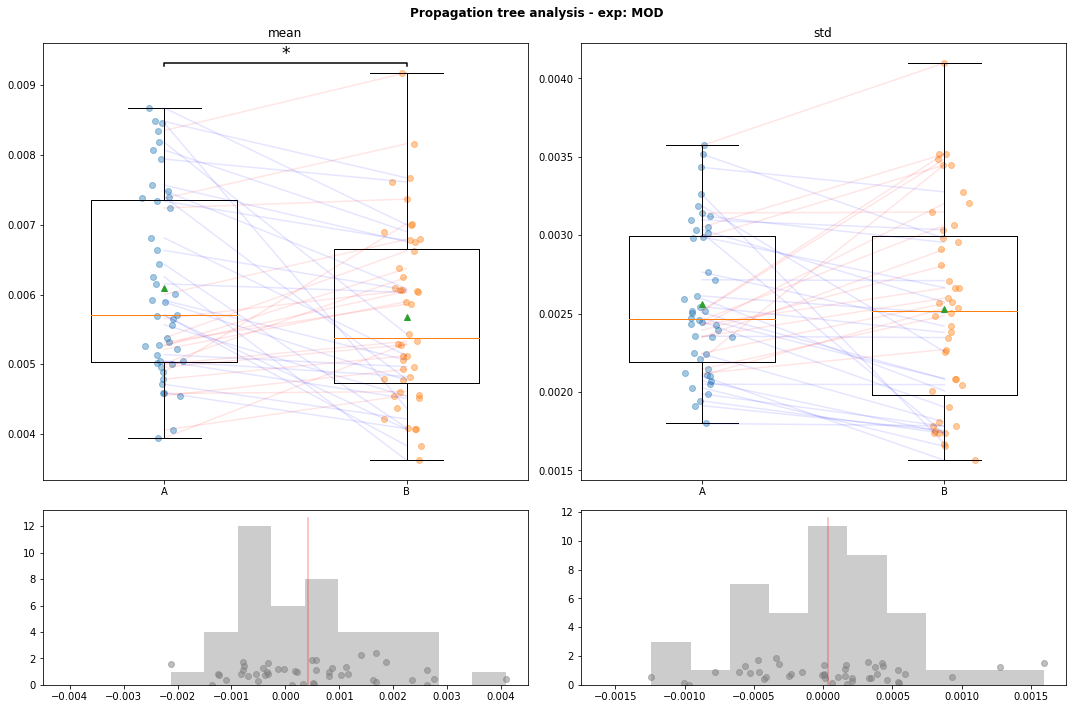

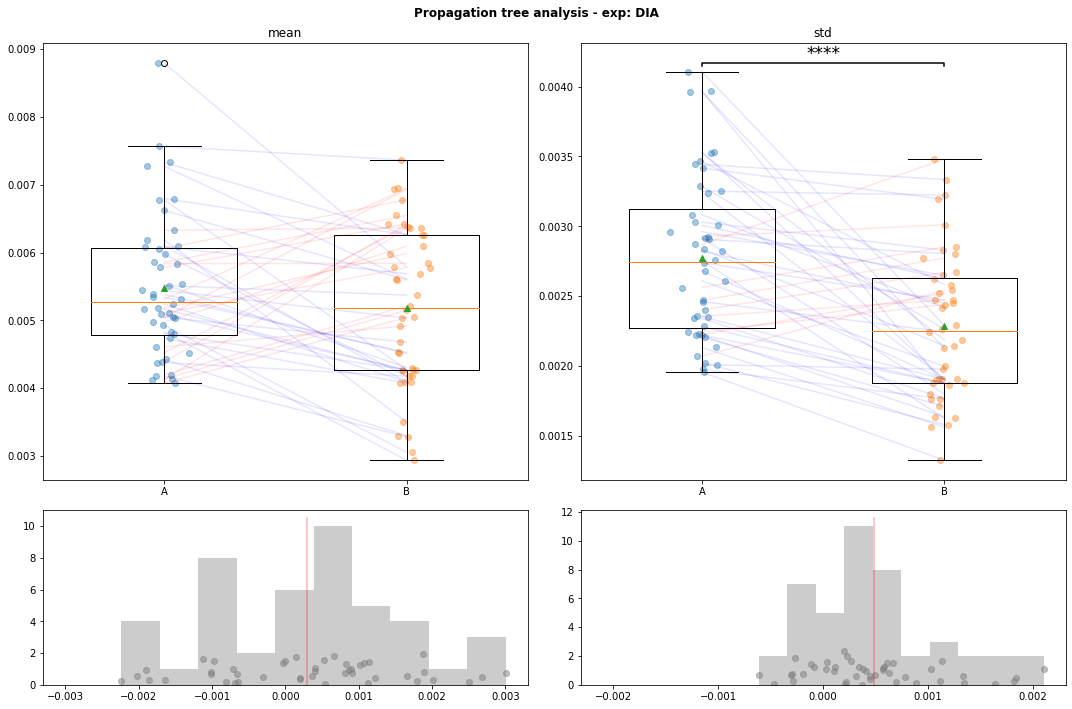

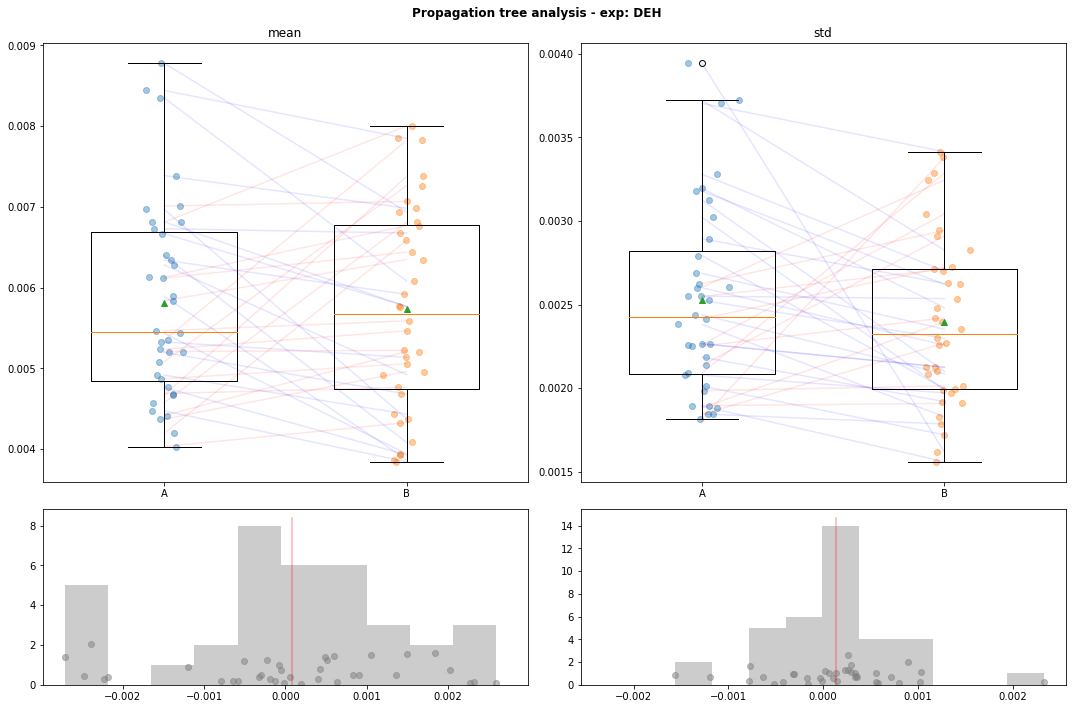

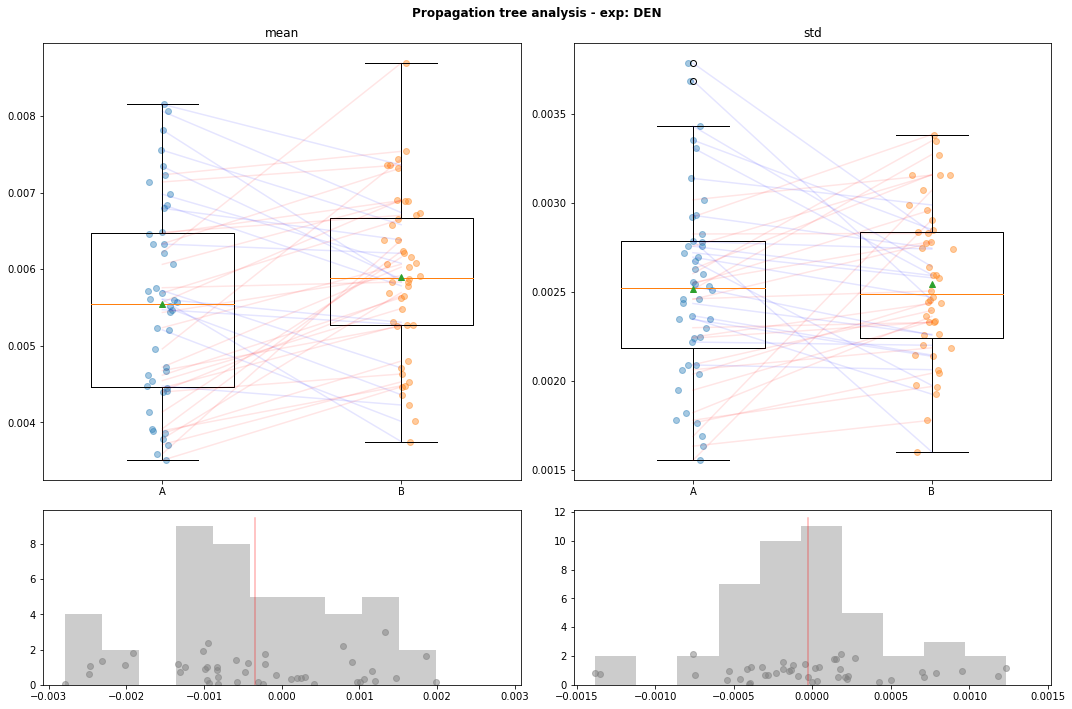

In [88]:
reps_discarded = [20,41]
plot_fld_path = 'plots/prop_tree_analysis_data_str/'


for exp in ['MOD', 'DIA', 'DEH', 'DEN']:

    df_filt = PTG_m_std_df.loc[(PTG_m_std_df.exp.isin([exp+'a',exp+'b'])) & (~PTG_m_std_df.rep.isin(reps_discarded))]
    df_filt = df_filt.sort_values(['rep','h'])

    # Export dataframe for stats
    df_filt.to_csv('NTM_df_stats.csv')


    # ============ STATISTICS ============
    %R -o pv_adj pv_adj <- stats_R()
    prop_list = ['mean', 'std']


    # ============= PLOTTING =============

    pv_dict = {prop_list[i]: pv_adj[i] for i in range(len(pv_adj))}
    pv_dict
    prop_list = list(pv_dict.keys())



    # Raw data specific property
    fig, axs = plt.subplots(2, len(prop_list), 
                            gridspec_kw={'height_ratios': [2.5, 1]},
                            figsize=(15,10))

    effect_dict = {}
    for idx_p, p in enumerate(prop_list):

        # dataframe for a-b comparison
        df_ab = pd.DataFrame()
        df_ab.insert(0, 'A', list(df_filt[p].iloc[::2]))
        df_ab.insert(1, 'B', list(df_filt[p].iloc[1::2]))
        df_ab['A-B'] = df_ab.A-df_ab.B


        # Plotting
        vals, names, xs = [],[],[]
        for i, col in enumerate(['A', 'B']):
            vals.append(df_ab[col].values)
            names.append(col)
            xs.append(np.random.normal(i + 1, 0.04, df_ab[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

        # box plot
        box_plot = axs[0,idx_p].boxplot(vals, labels=names, showmeans=True, widths=0.6)

        # scatter plot
        for x, val in zip(xs, vals):
            axs[0, idx_p].scatter(x, val, alpha=0.4)

        # step_line plot
        for idx_step_line in range(len(df_ab)):
            axs[0, idx_p].plot([1, 2], [df_ab.A.iloc[idx_step_line], df_ab.B.iloc[idx_step_line]], alpha=0.1,
                               color = 'r' if df_ab['A-B'].iloc[idx_step_line]<0 else 'b')

        means = df_ab.mean()
        stds =  df_ab.std()
        axs[0, idx_p].set_title(p)

        # statistical annotation

        if pv_dict[p]<=0.05:
            stat_sign = '*' + int(pv_dict[p]<=0.01)*'*' + int(pv_dict[p]<=0.001)*'*' + int(pv_dict[p]<=0.0001)*'*'
            x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
            mm =np.max(df_ab.max())
            y, h, col = 1.01*mm, 0.005*mm, 'k'
            axs[0, idx_p].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
            axs[0, idx_p].text((x1+x2)*.5, y+h, stat_sign, ha='center', va='bottom', color=col, fontsize=17)

        # save effect 
        effect_dict[p] = df_ab['A-B'].mean() / df_ab['A-B'].std()

        # Histogram of difference
        axs[1, idx_p].hist(df_ab['A-B'],alpha=0.4, color = 'gray')
        axs[1, idx_p].scatter(df_ab['A-B'], abs(np.random.normal(0, 1, df_ab['A-B'].values.shape[0])), color = 'gray', alpha = 0.5)
        axs[1, idx_p].set_xlim([-1.1*np.max(abs(df_ab['A-B'])), 1.1*np.max(abs(df_ab['A-B']))])
        axs[1, idx_p].plot([df_ab['A-B'].mean(), df_ab['A-B'].mean()], [0, axs[1, idx_p].get_ylim()[1]], color='r', alpha = 0.3)
        plt.tight_layout()



    title = 'Propagation tree analysis - exp: ' + exp 
    file_name = 'dist_comp_exp_' + exp

    fig = plt.suptitle(title, fontweight="bold")
    plt.tight_layout()
    plt.savefig(plot_fld_path + file_name + '.png', facecolor='white', transparent=False)
    #plt.close()


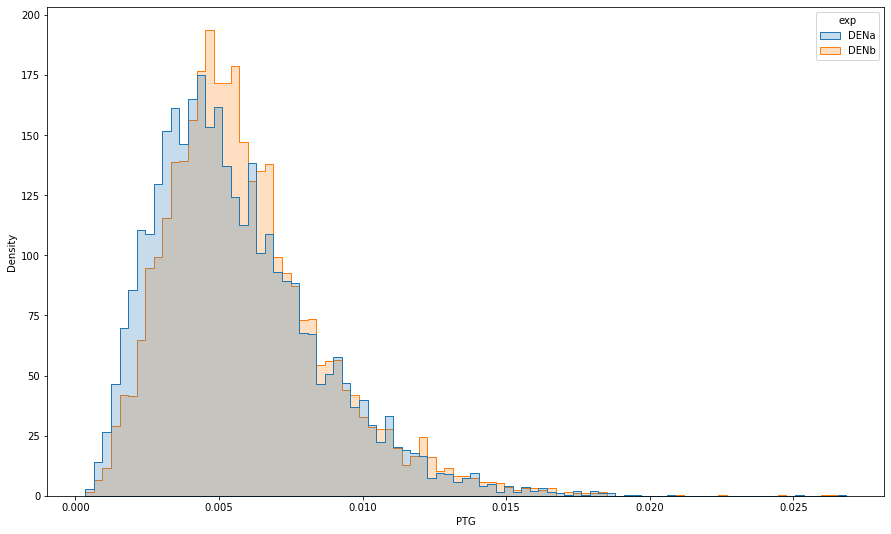

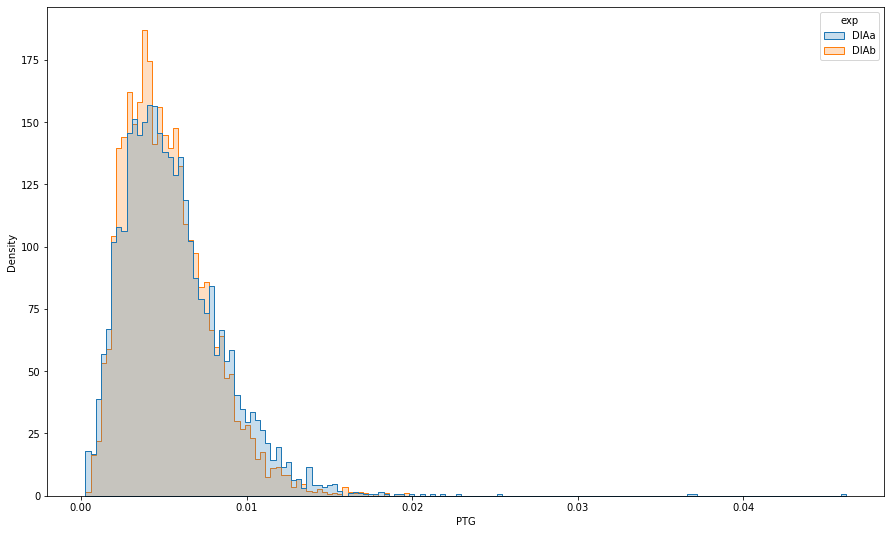

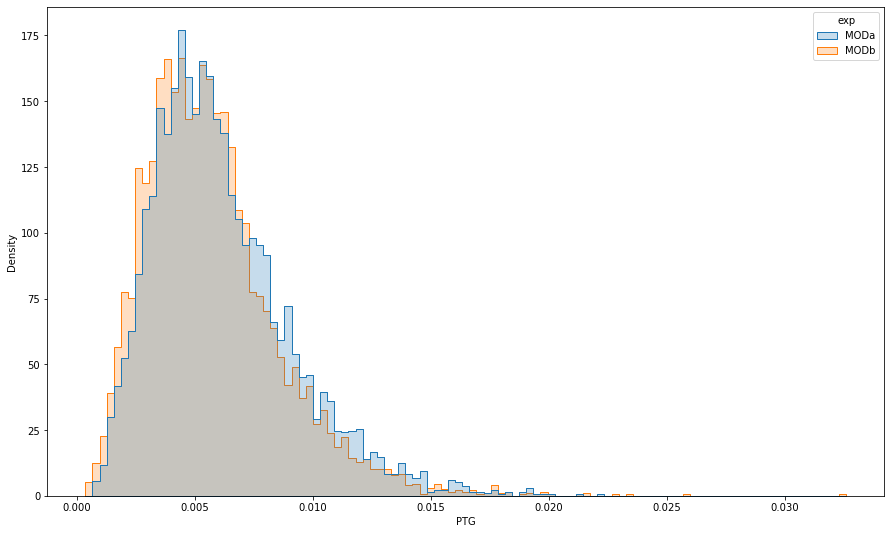

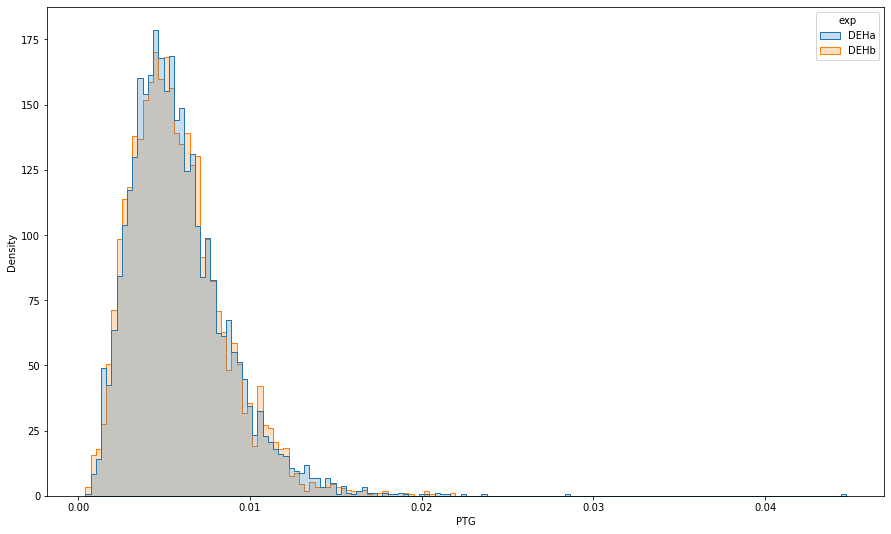

In [89]:
# Aux Plotting

for exp in ['DEN', 'DIA', 'MOD', 'DEH']:
    df_filt = PTG_df.loc[(PTG_df.exp.isin([exp+'a',exp+'b']))]# &
                               #(prop_coef_df.rep== 14) &
                               #(prop_coef_df.h == 2)]
    bins = np.linspace(0.001,0.01,50)
    
    
    plt.figure()
    sns.histplot(
        df_filt, x="PTG", hue="exp", element="step",
        stat="density", common_norm=False,
    )
    # m_list =list(prop_coef.keys())
    # tw = 0
    # for m_idx in range(0,10,2):

    #     plt.figure()
    #     plt.title(m_list[m_idx] + ' - ' + m_list[m_idx+1])
    #     sns.histplot(prop_coef[m_list[m_idx]][tw], bins = bins, color = 'r', label=m_list[m_idx])
    #     sns.histplot(prop_coef[m_list[m_idx + 1]][tw], bins = bins, label, m_list[m_idx+1])
